In [7]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [8]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    b[1:-1,1:-1] = rho*(((u[1:-1,2:] - u[1:-1,0:-2])/2*dx)**2 + ((u[2:,1:-1] - u[0:-2,1:-1])*(v[1:-1,2:]-v[1:-1,0:-2]))/(2*dx*dy)+ ((v[2:,1:-1] - v[0:-2,1:-1])/2*dy)**2 + (1/dt)*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx)+(v[2:,1:-1] - v[0:-2,1:-1])/(2*dy)))
    #Periodic BC at x = 0
    b[1:-1,0] = rho*(((u[1:-1,1] - u[1:-1,-1])/2*dx)**2 + ((u[2:,0] - u[0:-2,0])*(v[1:-1,1]-v[1:-1,-1]))/(2*dx*dy)+ ((v[2:,0] - v[0:-2,0])/2*dy)**2 + (1/dt)*((u[1:-1,1]-u[1:-1,-1])/(2*dx)+(v[2:,0] - v[0:-2,0])/(2*dy)))
    #periodic BC at x = 2
    b[1:-1,-1] = rho*(((u[1:-1,0] - u[1:-1,-2])/2*dx)**2 + ((u[2:,-1] - u[0:-2,-1])*(v[1:-1,0]-v[1:-1,-2]))/(2*dx*dy)+ ((v[2:,-1] - v[0:-2,-1])/2*dy)**2 + (1/dt)*((u[1:-1,0]-u[1:-1,-1])/(2*dx)+(v[2:,-1] - v[0:-2,-1])/(2*dy)))
    return b

In [9]:
def pressure_poisson(p, dx, dy, b):
    for n in range (nit):
        pn = p.copy()
        p[1:-1,1:-1] = (dy**2*(pn[1:-1,2:]+pn[1:-1,0:-2]) + dx**2*(pn[2:,1:-1]+pn[0:-2,1:-1]))/(2*(dx**2+dy**2)) - b[1:-1,1:-1]*dx**2*dy**2/(2*(dx**2+dy**2))
    #periodic BC at x = 0
        p[1:-1,0] = (dy**2*(pn[1:-1,1]+pn[1:-1,-1]) + dx**2*(pn[2:,0]+pn[0:-2,0]))/(2*(dx**2+dy**2)) - b[1:-1,0]*dx**2*dy**2/(2*(dx**2+dy**2))
    #periodic BC at x = 2
        p[1:-1,-1] = (dy**2*(pn[1:-1,0]+pn[1:-1,-2]) + dx**2*(pn[2:,-1]+pn[0:-2,-1]))/(2*(dx**2+dy**2)) - b[1:-1,-1]*dx**2*dy**2/(2*(dx**2+dy**2))
        p[-1,:] = p[-2,:]
        p[0,:] = p[1,:]
        return p

In [10]:
##variable declarations
nx = 41
ny = 41
nit = 50 
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)


##physical variables
rho = 1
nu = .1
F = 1
dt = .01

#initial conditions
u = numpy.zeros((ny, nx))
un = numpy.zeros((ny, nx))

v = numpy.zeros((ny, nx))
vn = numpy.zeros((ny, nx))

p = numpy.ones((ny, nx))
pn = numpy.ones((ny, nx))

b = numpy.zeros((ny, nx))

In [11]:

unorm = 1
u_steps = 1
while unorm > 1e-4:
    un = u.copy()
    vn = v.copy()
    b = build_up_b(b, rho, dt, u, v, dx, dy)
    p = pressure_poisson(p, dx, dy, b)
    u[1:-1,1:-1] = un[1:-1,1:-1] - (dt/dx)*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2]) - (dt/dy)*vn[1:-1,1:-1]*(un[1:-1,1:-1]-un[0:-2,1:-1]) - (dt/rho)*(p[1:-1,2:] - p[1:-1,0:-2])/(2*dx) + (nu*dt/dx**2)*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2]) + (nu*dt/dy**2)*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])+ F*dt
    v[1:-1,1:-1] = vn[1:-1,1:-1] - (dt/dx)*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[1:-1,0:-2]) - (dt/dy)*vn[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[0:-2,1:-1]) + (nu*dt/dx**2)*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2]) + (nu*dt/dy**2)*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1]) - (dt/rho)*(p[2:,1:-1] - p[0:-2,1:-1])/(2*dy)
    #bc at x = 0
    u[1:-1,0] = un[1:-1,0] - (dt/dx)*un[1:-1,0]*(un[1:-1,0]-un[1:-1,-1]) - (dt/dy)*vn[1:-1,0]*(un[1:-1,0]-un[0:-2,0]) - (dt/rho)*(p[1:-1,1] - p[1:-1,-1])/(2*dx) + (nu*dt/dx**2)*(un[1:-1,1]-2*un[1:-1,0]+un[1:-1,-1])+ (nu*dt/dy**2)*(un[2:,0]-2*un[1:-1,0]+un[0:-2,0])+ F*dt
    v[1:-1,0] = vn[1:-1,0] - (dt/dx)*un[1:-1,0]*(vn[1:-1,0]-vn[1:-1,-1]) - (dt/dy)*vn[1:-1,0]*(vn[1:-1,0]-vn[0:-2,0]) + (nu*dt/dx**2)*(vn[1:-1,1]-2*vn[1:-1,0]+vn[1:-1,-1]) + (nu*dt/dy**2)*(vn[2:,0]-2*vn[1:-1,0]+vn[0:-2,0]) - (dt/rho)*(p[2:,0] - p[0:-2,0])/(2*dy)
    #bc at x = 2
    u[1:-1,-1] = un[1:-1,-1] - (dt/dx)*un[1:-1,-1]*(un[1:-1,-1]-un[1:-1,-2]) - (dt/dy)*vn[1:-1,-1]*(un[1:-1,-1]-un[0:-2,-1]) - (dt/rho)*(p[1:-1,0] - p[1:-1,-2])/(2*dx) + (nu*dt/dx**2)*(un[1:-1,0]-2*un[1:-1,-1]+un[1:-1,-2])+ (nu*dt/dy**2)*(un[2:,-1]-2*un[1:-1,-1]+un[0:-2,-1])+ F*dt
    v[1:-1,-1] = vn[1:-1,-1] - (dt/dx)*un[1:-1,-1]*(vn[1:-1,1-1]-vn[1:-1,-2]) - (dt/dy)*vn[1:-1,-1]*(vn[1:-1,-1]-vn[0:-2,-1])  - (dt/rho)*(p[2:,-1] - p[0:-2,-1])/(2*dy) + (nu*dt/dx**2)*(vn[1:-1,0]-2*vn[1:-1,-1]+vn[1:-1,-2]) + (nu*dt/dy**2)*(vn[2:,-1]-2*vn[1:-1,-1]+vn[0:-2,-1])
        
    u[0,:] = 0
    u[-1,:] = 0
    v[0,:] = 0
    v[-1,:] = 0
    
    unorm = (numpy.sum(u) - numpy.sum(un)) / numpy.sum(u)
    u_steps += 1
        
        
        

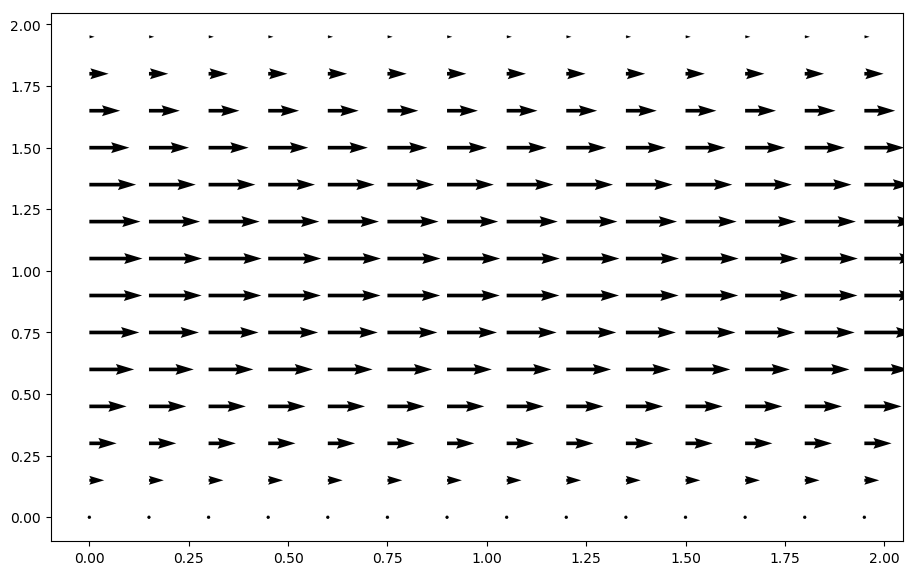

In [12]:
fig = pyplot.figure(figsize = (11,7), dpi=100)
pyplot.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]);

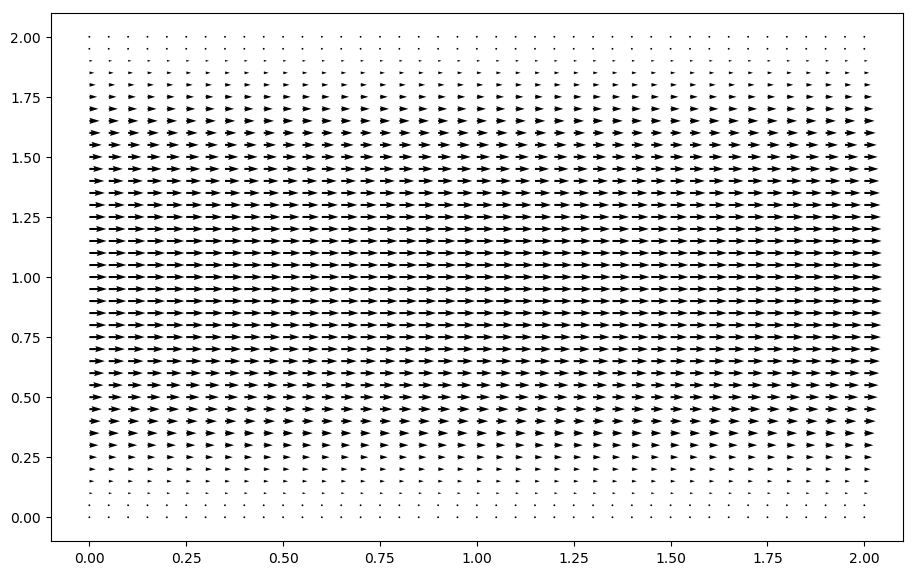

In [13]:
fig = pyplot.figure(figsize = (11,7), dpi=100)
pyplot.quiver(X, Y, u, v);